**Profitable App Profiles for and Google Play Markets**



Our aim in this project is to find mobile app profiles that are profitable for Google Play markets. We're working as data analysts for a company that builds Android mobile apps, and our job is to enable our team of developers to make data-driven decisions with respect to the kind of apps they build.

At our company, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. This means that our revenue for any given app is mostly influenced by the number of users that use our app. Our goal for this project is to analyze data to help our developers understand what kinds of apps are likely to attract more users.

**1-Loading the data to prepare for the analysis**

In [180]:
#importing reqired libraries for loading and analysing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
#LOADING GOOGLE DATA
google_path = "C:/Users/suzan/Downloads/googleplaystore.csv"
g_data = pd.read_csv(google_path)
#PREVIEWING GOOGLE STORE APP DATA
play_store = pd.DataFrame(g_data)
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [182]:
# Exploring google play store's data
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [183]:
# previewing google play store statistical description
play_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [184]:
# Find duplicates based on 'Name' and 'City' columns
duplicates = play_store[play_store.duplicated(subset=["App"])]

# Display duplicates
duplicates


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [185]:
# Remove duplicates based on the 'APP' column
play_store = play_store.drop_duplicates(subset=['App'])

print("\nDataFrame After Removing Duplicates:")
print(play_store)


DataFrame After Removing Duplicates:
                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIF

In [186]:
# from the data above there is a column showing rating of 19 and the max rating is supposed to be 5 
# locating the row that has wrong rating
wrong_data = play_store[play_store["Rating"]==19.0]
wrong_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [187]:
# Deleting the wrong row that has rating of 19.0
play_store=play_store.drop(index=10472)


In [188]:
# exploring the unique categories for all Apps
play_store["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [189]:
# make sure that the wrong row has been deleted from the data by exploring the max rating if it still 19.0 that means the row hasn't been deleted
play_store.describe()

,Rating
count,8196.000000
mean,4.173243
std,0.536625
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [190]:
# Remove (+) sign from Installs column
play_store['Installs'] = play_store['Installs'].str.replace('+', '', regex=False)
# Remove commas from Installs column and convert it's data type  into integers
play_store['Installs'] = play_store['Installs'].str.replace(',', '', regex=False).astype(int)

In [191]:
# previewing the values in price column to be able to filter the column by specific value 
play_store["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [192]:
#filtering data to preview only free APPs
free_app = play_store[play_store["Price"]=="0"]
free_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [193]:
free_app.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,8903,8903,7592.000000,8903,8903,8.903000e+03,8902,8903,8903,8903,8903,8897,8902
unique,8903,33,NaN,5139,408,NaN,1,1,6,114,1274,2697,33
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,NaN,0,Varies with device,NaN,Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1649,NaN,517,1156,NaN,8902,8903,7248,748,243,991,2079
mean,NaN,NaN,4.166372,NaN,NaN,8.431492e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.534163,NaN,NaN,5.594543e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,1.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,1.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,1.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
play_store['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [195]:
free_app.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,8903,8903,7592.000000,8903,8903,8.903000e+03,8902,8903,8903,8903,8903,8897,8902
unique,8903,33,NaN,5139,408,NaN,1,1,6,114,1274,2697,33
top,Photo Editor & Candy Camera & Grid & ScrapBook,FAMILY,NaN,0,Varies with device,NaN,Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1649,NaN,517,1156,NaN,8902,8903,7248,748,243,991,2079
mean,NaN,NaN,4.166372,NaN,NaN,8.431492e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.534163,NaN,NaN,5.594543e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,1.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,1.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,1.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
# Filter rows where 'Installs' =1000000000 (Top installed apps)
top_instaled_app = free_app[(free_app["Installs"] == 1000000000)]
top_instaled_app.count()

App               20
Category          20
Rating            20
Reviews           20
Size              20
Installs          20
Type              20
Price             20
Content Rating    20
Genres            20
Last Updated      20
Current Ver       20
Android Ver       20
dtype: int64

In [197]:
top_instaled_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device


In [198]:
top_instaled_app["App"]

152                            Google Play Books
335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
391                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
2544                                    Facebook
2545                                   Instagram
2554                                     Google+
2808                               Google Photos
3117                   Maps - Navigate & Explore
3127                          Google Street View
3234                                      Google
3454                                Google Drive
3665                                     YouTube
3687                     Google Play Movies & TV
3736                                 Google News
Name: App, dtype: ob

In [199]:
top_instaled_app["Category"].unique()

array(['BOOKS_AND_REFERENCE', 'COMMUNICATION', 'ENTERTAINMENT', 'GAME',
       'SOCIAL', 'PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', 'TOOLS',
       'PRODUCTIVITY', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES'],
      dtype=object)

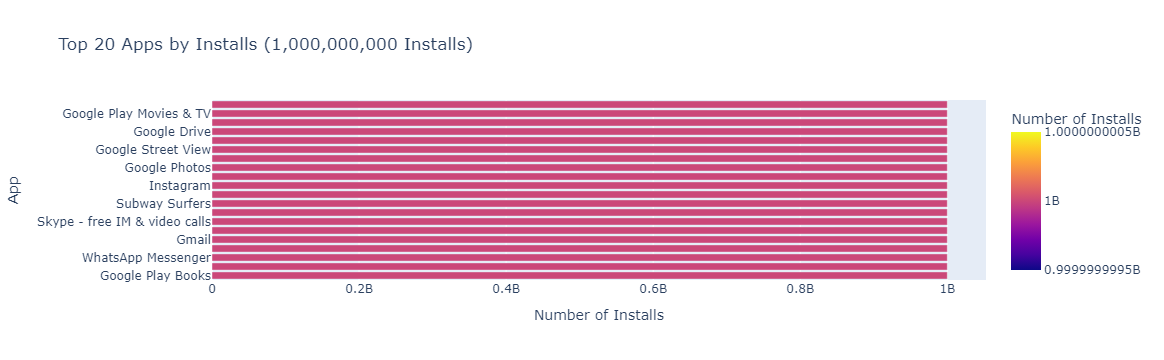

In [213]:
# Create a horizontal bar plot using Plotly
fig = px.bar(top_instaled_app,
             x='Installs',
             y='App',
             orientation='h',  # Horizontal bars
             color='Installs',
             title='Top 20 Apps by Installs (1,000,000,000 Installs)',
             labels={'Installs': 'Number of Installs', 'App': 'App'})

# Show the plot
fig.show()


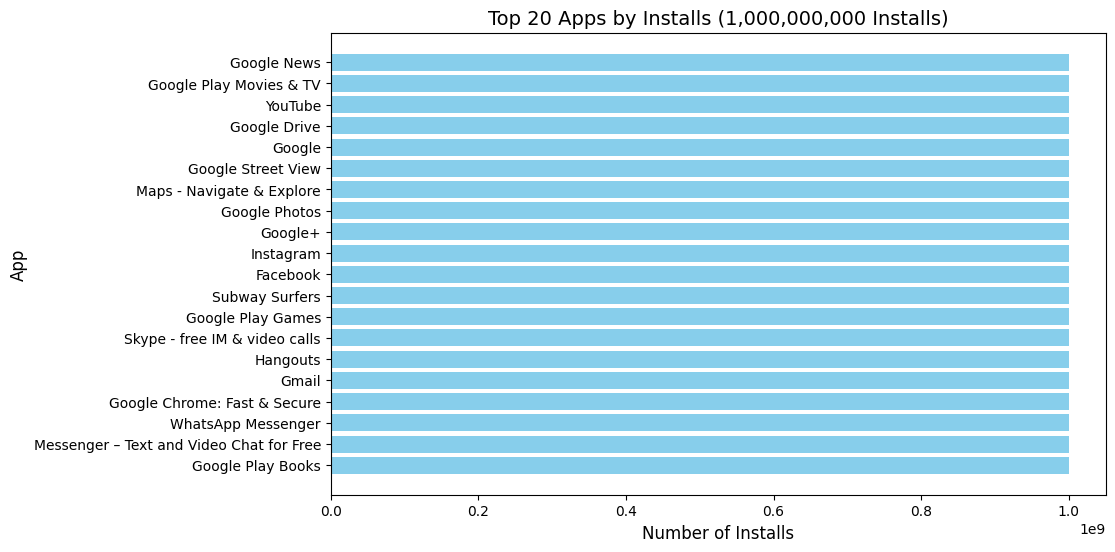

In [200]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_instaled_app['App'], top_instaled_app['Installs'], color="skyblue")

# Add titles and labels
plt.title('Top 20 Apps by Installs (1,000,000,000 Installs)', fontsize=14)
plt.xlabel('Number of Installs', fontsize=12)
plt.ylabel('App', fontsize=12)

# Show the plot
plt.show()


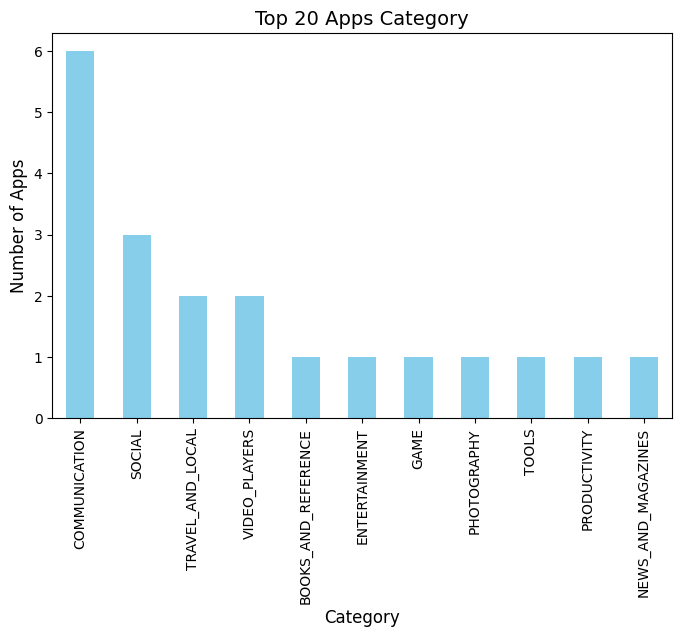

In [201]:
import matplotlib.pyplot as plt

# Count the number of apps in each category
category_counts = top_instaled_app['Category'].value_counts()

# Sort the category counts in descending order
category_counts_sorted = category_counts.sort_values(ascending=False)

# Plot the sorted bar chart
plt.figure(figsize=(8, 5))
category_counts_sorted.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Top 20 Apps Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)

# Show the plot
plt.show()



In [202]:
# Filter rows where 'Installs' =1000000000 (Top installed apps)
top44_instaled_app = free_app[(free_app["Installs"] == 1000000000) | (free_app["Installs"] == 500000000)]
top44_instaled_app.count()

App               44
Category          44
Rating            44
Reviews           44
Size              44
Installs          44
Type              44
Price             44
Content Rating    44
Genres            44
Last Updated      44
Current Ver       44
Android Ver       44
dtype: int64

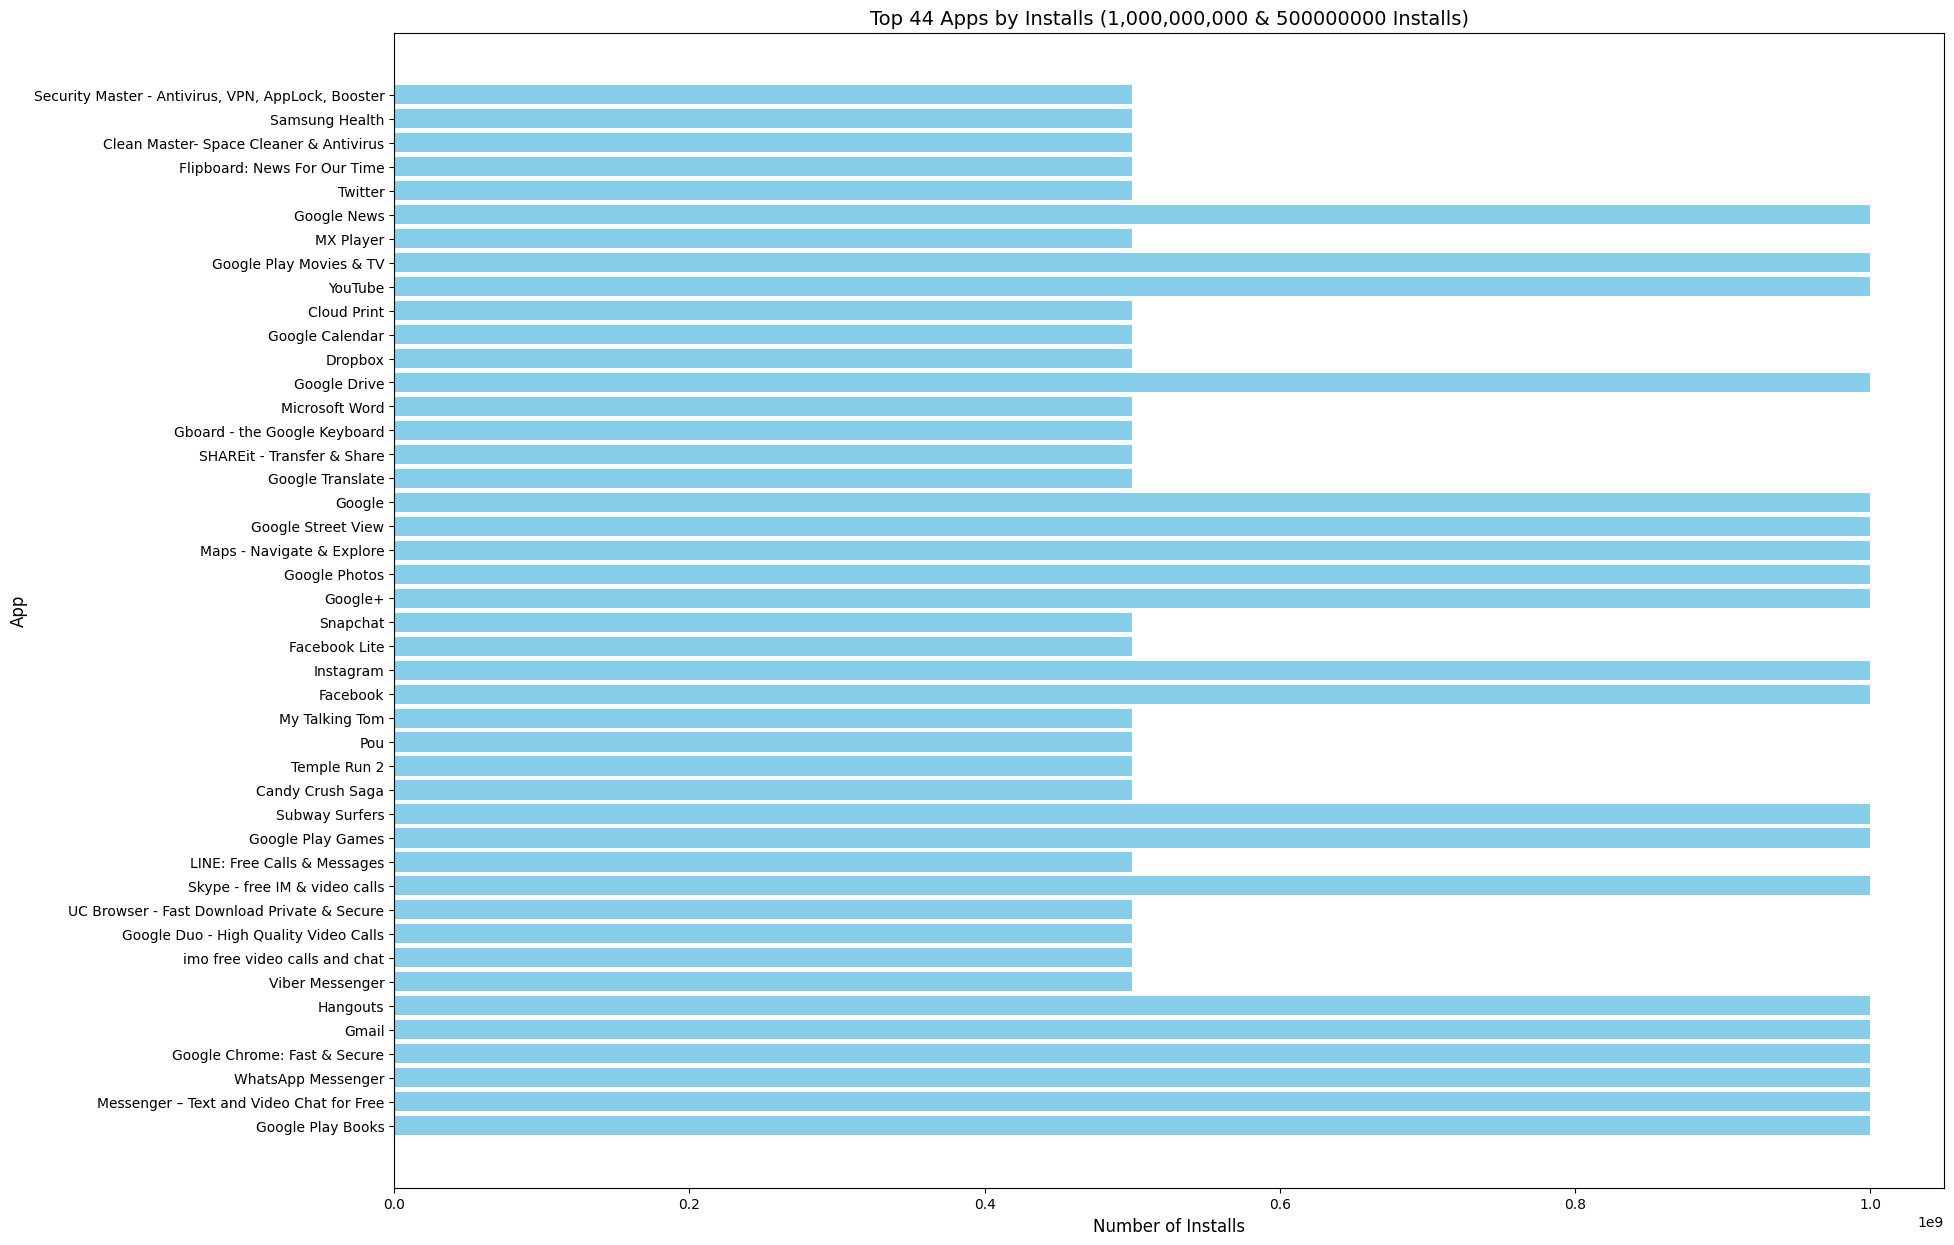

In [203]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(20, 15))
plt.barh(top44_instaled_app['App'], top44_instaled_app['Installs'], color="skyblue")

# Add titles and labels
plt.title('Top 44 Apps by Installs (1,000,000,000 & 500000000 Installs)', fontsize=14)
plt.xlabel('Number of Installs', fontsize=12)
plt.ylabel('App', fontsize=12)

# Show the plot
plt.show()

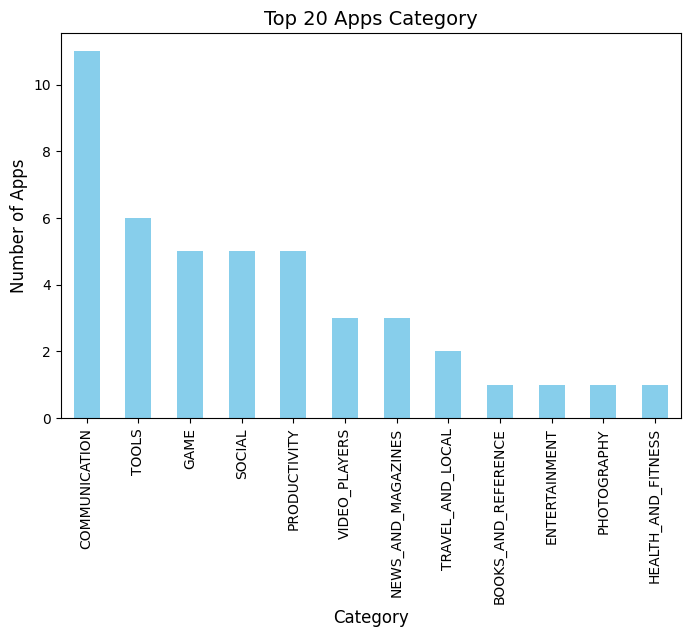

In [204]:
import matplotlib.pyplot as plt

# Count the number of apps in each category
category_counts44 = top44_instaled_app['Category'].value_counts()

# Sort the category counts in descending order
category_counts_sorted44 = category_counts44.sort_values(ascending=False)

# Plot the sorted bar chart
plt.figure(figsize=(8, 5))
category_counts_sorted44.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Top 20 Apps Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)

# Show the plot
plt.show()


In [205]:
communication = top44_instaled_app[top44_instaled_app['Category'] == "COMMUNICATION"]['App'].unique()
communication

array(['Messenger – Text and Video Chat for Free', 'WhatsApp Messenger',
       'Google Chrome: Fast & Secure', 'Gmail', 'Hangouts',
       'Viber Messenger', 'imo free video calls and chat',
       'Google Duo - High Quality Video Calls',
       'UC Browser - Fast Download Private & Secure',
       'Skype - free IM & video calls', 'LINE: Free Calls & Messages'],
      dtype=object)

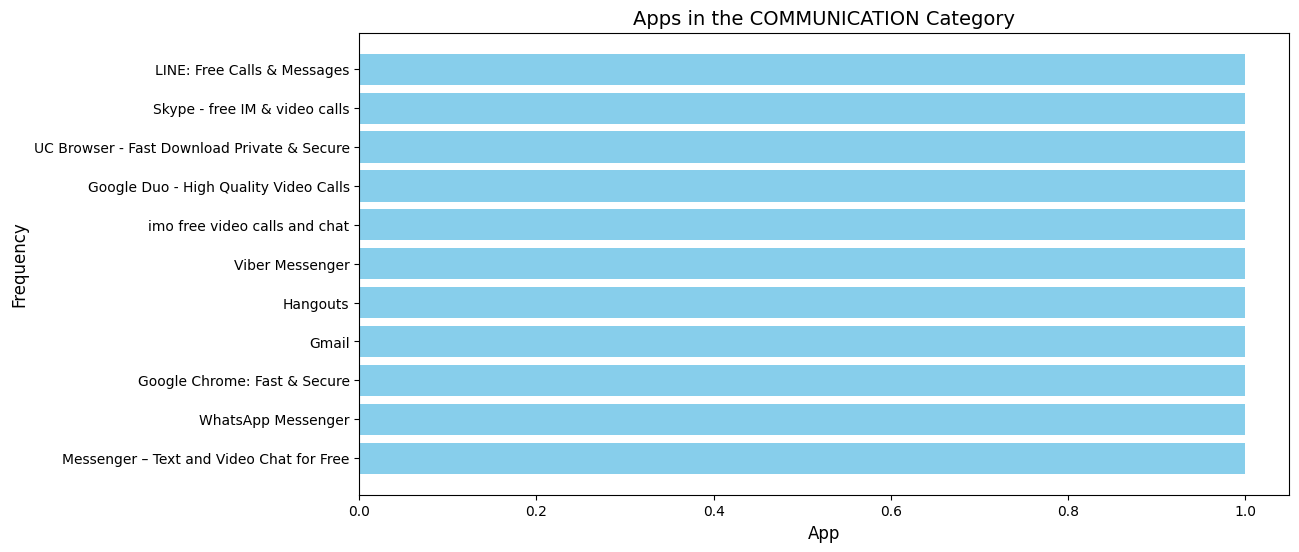

In [206]:
import matplotlib.pyplot as plt

# Filter the apps in the 'COMMUNICATION' category
communication_apps = top44_instaled_app[top44_instaled_app['Category'] == "COMMUNICATION"]['App'].unique()

# Plot the apps in the 'COMMUNICATION' category
plt.figure(figsize=(12, 6))
plt.barh(communication_apps, [1] * len(communication_apps), color='skyblue')  # Assigning a value of 1 for each app

# Add titles and labels
plt.title('Apps in the COMMUNICATION Category', fontsize=14)
plt.xlabel('App', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


In [207]:
import plotly.express as px

# Filter the apps in the 'COMMUNICATION' category
communication_apps = top44_instaled_app[top44_instaled_app['Category'] == "COMMUNICATION"]

# Plot the data using Plotly
fig = px.bar(communication_apps, 
             x='App', 
             y='Installs',  # Assuming you have 'Installs' column to visualize
             title='Top Communication Apps by Installs',
             labels={'App': 'App Name', 'Installs': 'Number of Installs'})

# Show the plot
fig.show()


In [208]:
tools_apps = top44_instaled_app[top44_instaled_app['Category'] == "TOOLS"]['App'].unique()
tools_apps

array(['Google', 'Google Translate', 'SHAREit - Transfer & Share',
       'Gboard - the Google Keyboard',
       'Clean Master- Space Cleaner & Antivirus',
       'Security Master - Antivirus, VPN, AppLock, Booster'], dtype=object)

In [209]:
import plotly.express as px

# Filter the apps in the 'COMMUNICATION' category
tools_apps = top44_instaled_app[top44_instaled_app['Category'] == "TOOLS"]

# Plot the data using Plotly
fig = px.bar(tools_apps, 
             x='App', 
             y='Installs',  # Assuming you have 'Installs' column to visualize
             title='Top TOOLS Apps by Installs',
             labels={'App': 'App Name', 'Installs': 'Number of Installs'})

# Show the plot
fig.show()

In [210]:
games_apps = top44_instaled_app[top44_instaled_app['Category'] == "GAME"]['App'].unique()
games_apps

array([], dtype=object)

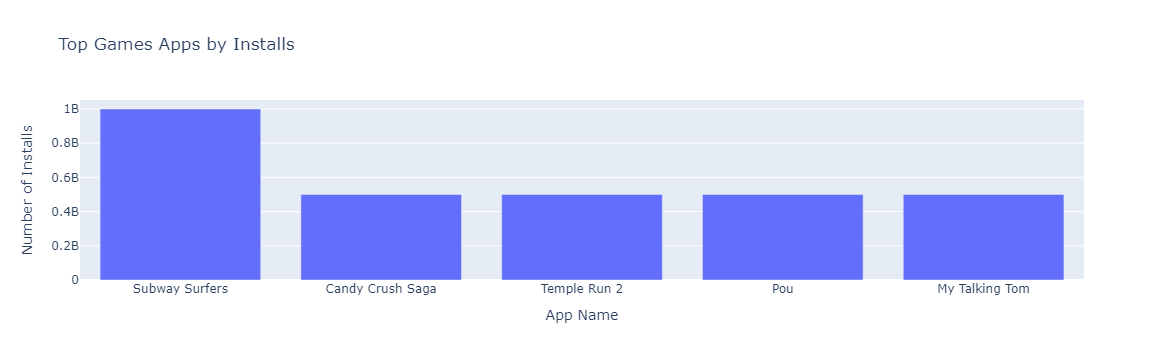

In [212]:
import plotly.express as px

# Filter the apps in the 'COMMUNICATION' category
games_apps = top44_instaled_app[top44_instaled_app['Category'] == "GAME"]

# Plot the data using Plotly
fig = px.bar(games_apps, 
             x='App', 
             y='Installs',  # Assuming you have 'Installs' column to visualize
             title='Top Games Apps by Installs',
             labels={'App': 'App Name', 'Installs': 'Number of Installs'})

# Show the plot
fig.show()

Conclusion for apps with google play market, that most used free apps are related to  Communication , Tools & games I recommend that our developers team make apps that related to these categories. 